In [1]:
!pip install paperswithcode-client

In [2]:
from paperswithcode import PapersWithCodeClient

client = PapersWithCodeClient()


In [3]:
areas_result = client.area_list() 
areas = areas_result.results
for area in areas:
    print(area)
    
target_area = areas[3].id
target_area

id='adversarial' name='Adversarial'
id='audio' name='Audio'
id='computer-code' name='Computer Code'
id='computer-vision' name='Computer Vision'
id='graphs' name='Graphs'
id='knowledge-base' name='Knowledge Base'
id='medical' name='Medical'
id='methodology' name='Methodology'
id='miscellaneous' name='Miscellaneous'
id='music' name='Music'
id='natural-language-processing' name='Natural Language Processing'
id='playing-games' name='Playing Games'
id='reasoning' name='Reasoning'
id='robots' name='Robots'
id='speech' name='Speech'
id='time-series' name='Time Series'


'computer-vision'

In [4]:
tasks_results = client.area_task_list(target_area, items_per_page=5000)


In [5]:
filtered_tasks = []

match_words = ["generation", "synthesis"]
filter_words = ["fundus", "handwritten", "proposal", "graph"]

for task in tasks_results.results:
    if any(x in task.id for x in match_words) and all(x not in task.id for x in filter_words):
        print(task.name)
        filtered_tasks.append(task.id)

print("\n Total number of tasks:", len(filtered_tasks))

Conditional Image Generation
Motion Synthesis
3D Surface Generation
Face Generation
Chinese Landscape Painting Generation
Indoor Scene Synthesis
Human action generation
ROI-based image generation
Speaker-Specific Lip to Speech Synthesis
Grasp Generation
Bird View Synthesis
Text-to-Face Generation
Pose-Guided Image Generation
Lip to Speech Synthesis
Unconditional Video Generation
User Constrained Thumbnail Generation
3D Shape Generation

 Total number of tasks: 17


In [6]:
all_evaluation_tables = []

for task in filtered_tasks:
    print("Working on", task)
    evaluation_results = client.task_evaluation_list(task)
    print("Number of evaluations in this task", len(evaluation_results.results))
    all_evaluation_tables.extend(evaluation_results.results)

#all_evaluation_tables

Working on conditional-image-generation
Number of evaluations in this task 9
Working on motion-synthesis
Number of evaluations in this task 3
Working on 3d-surface-generation
Number of evaluations in this task 0
Working on face-generation
Number of evaluations in this task 0
Working on chinese-landscape-painting-generation
Number of evaluations in this task 0
Working on indoor-scene-synthesis
Number of evaluations in this task 0
Working on human-action-generation
Number of evaluations in this task 4
Working on roi-based-image-generation
Number of evaluations in this task 0
Working on speaker-specific-lip-to-speech-synthesis
Number of evaluations in this task 7
Working on grasp-generation
Number of evaluations in this task 0
Working on bird-view-synthesis
Number of evaluations in this task 0
Working on text-to-face-generation
Number of evaluations in this task 0
Working on pose-guided-image-generation
Number of evaluations in this task 0
Working on lip-to-speech-synthesis
Number of eval

In [7]:
len(all_evaluation_tables)

25

In [8]:
for evaluation in all_evaluation_tables:
    print(evaluation.id)

conditional-image-generation-on-cifar-10
conditional-image-generation-on-imagenet-1
conditional-image-generation-on-artbench-10
conditional-image-generation-on-coco-animals
conditional-image-generation-on-imagenet64x64
conditional-image-generation-on-tiny-imagenet
conditional-image-generation-on-imagenet
conditional-image-generation-on-imagenet-2
conditional-image-generation-on-cifar-100
motion-synthesis-on-lafan1
motion-synthesis-on-humanml3d
motion-synthesis-on-humanact12
human-action-generation-on-human3-6m
human-action-generation-on-ntu-rgb-d-2d
human-action-generation-on-ntu-rgb-d
human-action-generation-on-ntu-rgb-d-120
speaker-specific-lip-to-speech-synthesis-on-6
speaker-specific-lip-to-speech-synthesis-on-4
speaker-specific-lip-to-speech-synthesis-on-3
speaker-specific-lip-to-speech-synthesis-on
speaker-specific-lip-to-speech-synthesis-on-5
speaker-specific-lip-to-speech-synthesis-on-7
speaker-specific-lip-to-speech-synthesis-on-1
lip-to-speech-synthesis-on-lrw
unconditional-v

In [9]:
all_evaluation_tables[0]

EvaluationTable(id='conditional-image-generation-on-cifar-10', task='conditional-image-generation', dataset='cifar-10', description='', mirror_url=None)

In [10]:
task_evaluation_metrics_list = client.evaluation_metric_list(all_evaluation_tables[0].id).results
task_evaluation_metrics_list

[Metric(id='038b5c9a-d884-44c5-b9d8-1168880cf976', name='Inception score', description='', is_loss=False),
 Metric(id='ef083821-b8c5-4976-81c1-6b77ca26c7fe', name='FID', description='', is_loss=True),
 Metric(id='00380096-929b-4fba-b4d9-6a1d9535b31d', name='Intra-FID', description='', is_loss=True)]

In [11]:
cifar10_results = client.evaluation_result_list(evaluation_id=all_evaluation_tables[0].id).results
cifar10_results

[Result(id='4026f1aa-3635-4673-87d3-d89fa11ea206', best_rank=1, metrics={'Inception score': '10.51', 'FID': '2.26'}, methodology='StyleGAN2 + DiffAugment + D2D-CE', uses_additional_data=False, paper='rebooting-acgan-auxiliary-classifier-gans', best_metric='Inception score', evaluated_on='2021-11-01', external_source_url=None),
 Result(id='2a8cd006-b838-4270-84d7-be4e965d66df', best_rank=2, metrics={'Inception score': '10.21', 'FID': '3.6'}, methodology='MIX-MHingeGAN', uses_additional_data=False, paper='lessons-learned-from-the-training-of-gans-on', best_metric='Inception score', evaluated_on='2020-07-13', external_source_url=None),
 Result(id='276dd021-d5f0-453b-8b99-740866bf2e62', best_rank=2, metrics={'Inception score': '10.14', 'FID': '2.42'}, methodology='StyleGAN2-ADA', uses_additional_data=False, paper='training-generative-adversarial-networks-with-2', best_metric='Inception score', evaluated_on='2020-06-11', external_source_url=None),
 Result(id='ffe68933-98e3-4363-a37f-b75494c

In [12]:
dates = []
fids = []

for result in cifar10_results:
    if result.metrics.get("FID"):
        print(result.evaluated_on, result.metrics["FID"])
        dates.append(result.evaluated_on)
        fids.append(result.metrics["FID"])


2021-11-01 2.26
2020-07-13 3.6
2020-06-11 2.42
2019-12-09 7.5
2020-12-05 6.89
2018-09-28 14.73
2020-12-05 8.03
2018-02-15 17.5
2020-04-05 5.34
2020-06-20 36.77
2021-07-21 5.66
2021-02-09 9.42
2020-06-23 10.30
2019-10-26 11.67


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

cifar10_df = pd.DataFrame({"dates":dates, "fids":fids})
cifar10_df["fids"] = cifar10_df["fids"].astype(float)
cifar10_df = cifar10_df.sort_values(by="dates")
cifar10_df = cifar10_df.set_index("dates")
cifar10_df

,fids
dates,
2018-02-15,17.50
2018-09-28,14.73
2019-10-26,11.67
2019-12-09,7.50
2020-04-05,5.34
2020-06-11,2.42
2020-06-20,36.77
2020-06-23,10.30
2020-07-13,3.60


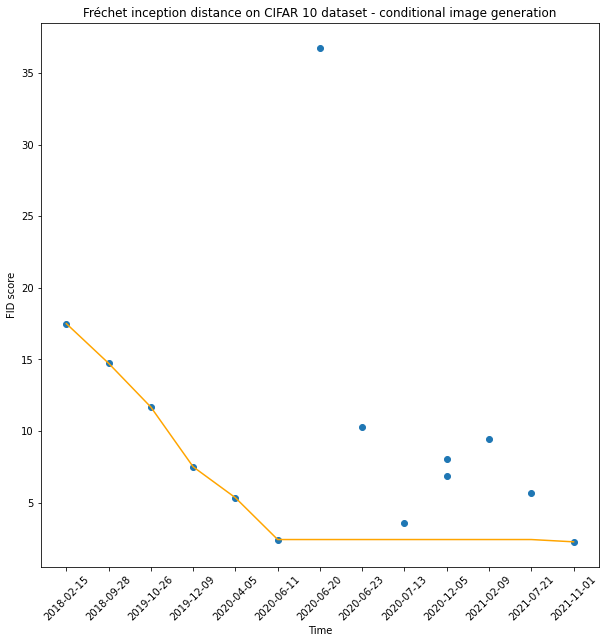

In [14]:
fig, ax = plt.subplots()
plt.gcf().set_size_inches(10, 10)
ax.scatter(cifar10_df.index, cifar10_df.fids)
plt.plot(cifar10_df.cummin(), color="orange")
ax.set_xlabel("Time")
ax.set_ylabel("FID score")
ax.set_title("Fréchet inception distance on CIFAR 10 dataset - conditional image generation")

plt.xticks(rotation = 45) 
plt.show()

In [15]:
imagenet_results = client.evaluation_result_list(evaluation_id=all_evaluation_tables[6].id).results
imagenet_results

[Result(id='47c2e8e0-b98d-45a6-8e9d-101e1d444b3d', best_rank=1, metrics={'FID': '2.63', 'Inception score': '159.72'}, methodology='ADM-G + EDS (ED-DPM, classifier_scale=0.4)', uses_additional_data=False, paper='entropy-driven-sampling-and-training-scheme', best_metric='FID', evaluated_on='2022-03-07', external_source_url=None),
 Result(id='8176ac4e-53ea-4ea0-8ca9-0ab134a6d2ff', best_rank=None, metrics={'FID': '2.68', 'Inception score': '169.24'}, methodology='ADM-G + EDS + ECT (ED-DPM, classifier_scale=0.6)', uses_additional_data=False, paper='entropy-driven-sampling-and-training-scheme', best_metric=None, evaluated_on='2022-03-07', external_source_url=None),
 Result(id='e044fa0f-e858-47de-b9f5-7027ad5774fb', best_rank=None, metrics={'FID': '2.97'}, methodology='ADM-G (classifier_scale=0.5)', uses_additional_data=False, paper='diffusion-models-beat-gans-on-image-synthesis', best_metric=None, evaluated_on='2021-05-11', external_source_url=None),
 Result(id='5d14cd37-9173-4749-9a46-6c0dd

In [16]:
dates = []
fids = []

for result in imagenet_results:
    if result.metrics.get("FID"):
        print(result.evaluated_on, result.metrics["FID"])
        dates.append(result.evaluated_on)
        fids.append(result.metrics["FID"])


2022-03-07 2.63
2022-03-07 2.68
2021-05-11 2.97
2018-09-28 5.7
2020-11-26 6.53
2019-10-26 6.66
2019-03-06 7.7
2021-07-21 8.02
2021-11-01 8.206
2020-11-26 8.30
2018-09-28 8.7
2021-09-10 9.5
2020-07-30 9.61
2020-04-05 13.77
2020-09-26 14.80
2019-11-27 15.94
2018-05-21 18.65
2018-02-15 27.62


In [17]:

imagenet_df = pd.DataFrame({"dates":dates, "fids":fids})
imagenet_df["fids"] = imagenet_df["fids"].astype(float)
imagenet_df = imagenet_df.sort_values(by="dates")
imagenet_df = imagenet_df.set_index("dates")
imagenet_df

,fids
dates,
2018-02-15,27.620
2018-05-21,18.650
2018-09-28,5.700
2018-09-28,8.700
2019-03-06,7.700
2019-10-26,6.660
2019-11-27,15.940
2020-04-05,13.770
2020-07-30,9.610


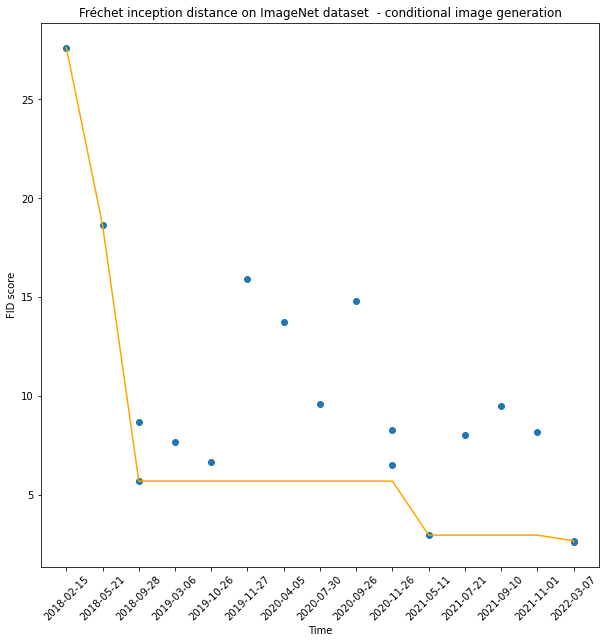

In [18]:
fig, ax = plt.subplots()
plt.gcf().set_size_inches(10, 10)
ax.scatter(imagenet_df.index, imagenet_df.fids)
plt.plot(imagenet_df.cummin(), color="orange")
plt.xticks(rotation = 45) 
ax.set_xlabel("Time")
ax.set_ylabel("FID score")
ax.set_title("Fréchet inception distance on ImageNet dataset  - conditional image generation")

plt.show()

In [19]:
targets = imagenet_df.cummin().drop_duplicates()
targets

,fids
dates,
2018-02-15,27.62
2018-05-21,18.65
2018-09-28,5.70
2021-05-11,2.97
2022-03-07,2.68
2022-03-07,2.63


In [20]:
import numpy as np

basedate = pd.to_datetime(targets.index[0])

times = pd.to_datetime(targets.index).to_series().apply(lambda x: (x - basedate).days).values +1
times

array([   1,   96,  226, 1182, 1482, 1482])

In [21]:
future = np.array([times[-1]+x*365 for x in range(4)])
future

array([1482, 1847, 2212, 2577])

/tmp/ipykernel_20646/1435391997.py:5: RuntimeWarning: invalid value encountered in log
  return (A * (np.log(K * t) / np.log(0.5))) + C


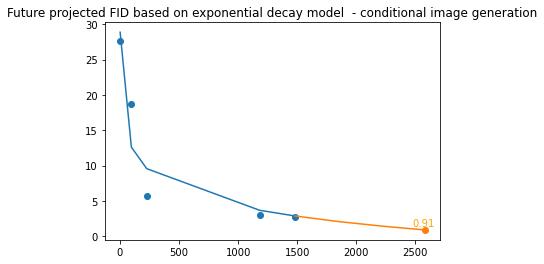

In [28]:
import scipy as sp
import scipy.optimize

def model_func(t, A, K, C):
    return (A * (np.log(K * t) / np.log(0.5))) + C

def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y, maxfev=1000)
    A, K, C = opt_parms
    return A, K, C

A, K, C = fit_exp_nonlinear(times[:-1], targets.fids.values[:-1])
fit_y = model_func(times[:-1], A, K, C)

future_y = model_func(future, A, K, C)

plt.plot(times[:-1], fit_y)
plt.scatter(times[:-1], targets.fids.values[:-1])
plt.plot(future, future_y)
plt.scatter(future[-1:], future_y[-1:])

plt.text(future[-1]-100, future_y[-1]+0.5, str(future_y[-1])[:4], color="orange")
plt.title("Future projected FID based on exponential decay model  - conditional image generation")
plt.show()
#print(A, K, C)
#print(fit_y)

In [23]:
#TODO: why warning? why does it not react to changing 0.5 in log?